# MinTEs reduced templates preserve BAGEL performances 

## Import datasets

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('../results/library-independent_RTs/BAGEL_vs_MAGeCK.tsv', sep='\t')

## Plots

Bland-Altman plots comparing BAGEL and MAGeCK performances in terms of ability to correctly classify essential and nonessential genes. The two methods are applied to the project Score cancer dependency dataset. Values on the y-axis indicate the difference in performance between BAGEL and MAGeCK when applied to an individual cell line screen. Values on the x-axis indicate the average of the two AUC values, thus the overall screen quality. Plots in the upper row are obtained using the original reference gene-sets as a template classifier for BAGEL, whereas plots in lower row are obtained using the MinTEs RTs of minimal size (5%):

[Text(0.86, 0, '0.86'),
 Text(0.89, 0, '0.89'),
 Text(0.92, 0, '0.92'),
 Text(0.95, 0, '0.95'),
 Text(0.98, 0, '0.98')]

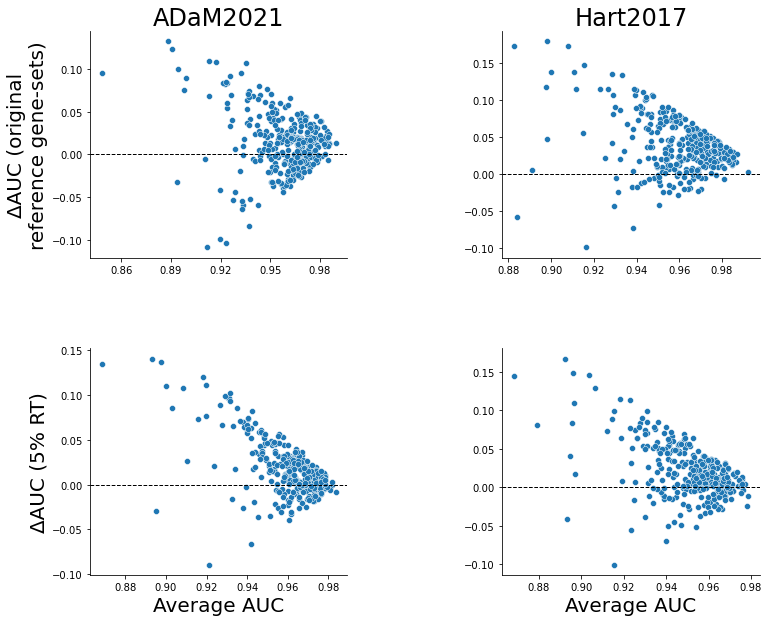

In [27]:
g = sns.FacetGrid(data = df, col = 'gset', row = 'perc', gridspec_kws={"wspace":0.6, "hspace":0.4},
    height = 5, aspect = 1.2, margin_titles = True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'avg', 'diff')
g.axes[1,0].set_xlabel('Average AUC', size=20)
g.axes[1,1].set_xlabel('Average AUC', size=20)
g.axes[0,0].set_ylabel('ΔAUC (original\nreference gene-sets)', size=20)
g.axes[1,0].set_ylabel('ΔAUC (5% RT)', size=20)
g.set_titles(col_template="{col_name}", row_template="", size=24)

for ax in g.axes.flat:
    ax.axhline(0, ls='--', linewidth=1, color='black')
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

x_axis = g.axes[0,0].get_xticks()
x_init = np.round(x_axis[0], decimals=2)
x_dist = np.arange(x_init+0.02, 1, 0.03)
x_axis = np.round(x_dist, decimals=2)

g.axes[0,0].set_xticks(x_axis)
g.axes[0,0].set_xticklabels(x_axis)